# PS Transfer: 04: Mini Scans

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

### Figure parameters

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1.5

### Function Declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

In [4]:
def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

In [5]:
def cubic(x, a, m, c, b):
    return a*x**2 + x*m + c + b*x**3

In [6]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)

In [7]:
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [8]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [9]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Import all data

In [10]:
# NoSC NoRF
dd1 = dict()

#dd1 = add_input_file(dd1, '01_Lattice_NoSC_NoRF/output/output.mat', 'Lat NoSC NoRF')
#dd1 = add_input_file(dd1, '02_Op_NoSC_NoRF/output/output.mat', 'Op NoSC NoRF')
#dd1 = add_input_file(dd1, '03_ReM_NoSC_NoRF/output/output.mat', 'ReM NoSC NoRF')

# SC NoRF
dd1 = add_input_file(dd1, '04_Lattice_SC_NoRF/output/output.mat', 'Lat SC NoRF')
dd1 = add_input_file(dd1, '05_Op_SC_NoRF/output/output.mat', 'Op SC NoRF')
dd1 = add_input_file(dd1, '06_ReM_SC_NoRF/output/output.mat', 'ReM SC NoRF')

# NoSC RF
#dd1 = dict()
#dd1 = add_input_file(dd1, '07_Lattice_NoSC_RF/output/output.mat', 'Lat NoSC RF')
#dd1 = add_input_file(dd1, '08_Op_NoSC_RF/output/output.mat', 'Op NoSC RF')
#dd1 = add_input_file(dd1, '09_ReM_NoSC_RF/output/output.mat', 'ReM NoSC RF')

# SC RF
#dd1 = dict()
#dd1 = add_input_file(dd1, '10_Lattice_SC_RF/output/output.mat', 'Lat SC RF')
#dd1 = add_input_file(dd1, '11_Op_SC_RF/output/output.mat', 'Op SC RF')
#dd1 = add_input_file(dd1, '12_ReM_SC_RF/output/output.mat', 'ReM SC RF')

	Added output data from  04_Lattice_SC_NoRF/output/output.mat 	 dictionary key:  Lat SC NoRF
	Added output data from  05_Op_SC_NoRF/output/output.mat 	 dictionary key:  Op SC NoRF
	Added output data from  06_ReM_SC_NoRF/output/output.mat 	 dictionary key:  ReM SC NoRF


# No RF No SC Dispersion Matching

## Plot parameters

In [11]:
save_folder = 'Plots/SC_NoRF/'

sc = 'SC_NoRF'
legend_label = 'Case' # r'$\frac{\delta p}{p_0}$'
main_label = 'D_Mismatch'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 40
zoom_turns = 15
betagamma = 2.492104532 * 0.9159915293879255

In [12]:
bet_Lat = (np.mean(dd1['Lat SC NoRF']['beta_x'][0]))
bet_Op = (np.mean(dd1['Op SC NoRF']['beta_x'][0]))
bet_ReM = (np.mean(dd1['ReM SC NoRF']['beta_x'][0]))
print round_sig(bet_Lat, 5)
print round_sig(bet_Op, 5)
print round_sig(bet_ReM, 5)

12.316
12.323
12.315


In [13]:
bet_Lat_y = (np.mean(dd1['Lat SC NoRF']['beta_y'][0]))
bet_Op_y = (np.mean(dd1['Op SC NoRF']['beta_y'][0]))
bet_ReM_y = (np.mean(dd1['ReM SC NoRF']['beta_y'][0]))
print round_sig(bet_Lat_y, 5)
print round_sig(bet_Op_y, 5)
print round_sig(bet_ReM_y, 5)

21.193
21.192
21.19


In [14]:
dd1['ReM SC NoRF'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'orbit_x_max',
 'turn_time',
 'n_mp',
 'min_xp',
 'orbit_x_min',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 'orbit_y_max',
 'orbit_y_min',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

Lat SC NoRF  D_x_0 =  2.34  m, Delta_D_x =  0.174  m
Op SC NoRF  D_x_0 =  2.64  m, Delta_D_x =  0.968  m
ReM SC NoRF  D_x_0 =  2.66  m, Delta_D_x =  0.0265  m


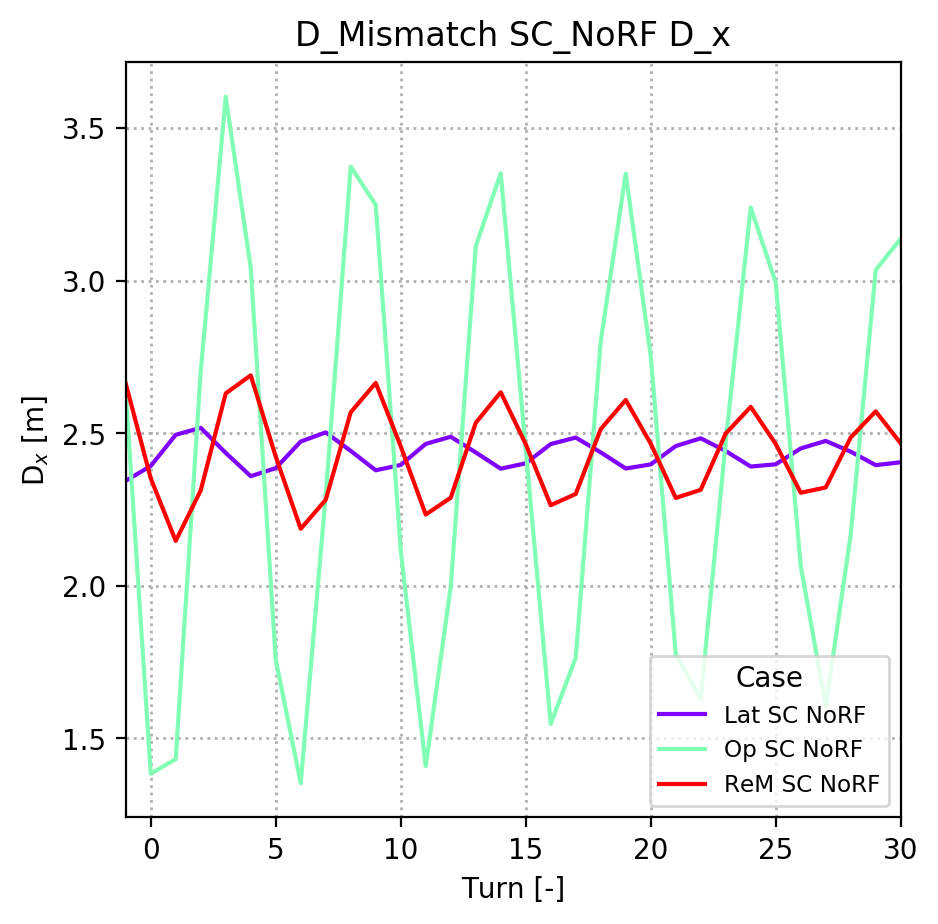

In [15]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        print key, ' D_x_0 = ', round_sig(dd1[key][parameter][0][0],3), ' m, Delta_D_x = ', round_sig(np.max(dd1[key][parameter][0]) - dd1[key][parameter][0][0], 3), ' m'
    
        y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
        #try:
        #    freq = pnf.naff(y, turns=turn_tot, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
        #except IndexError:
        #    continue
        #lab_ = key + r' f$_{D_x} = $' +str(round_sig(freq,4))
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

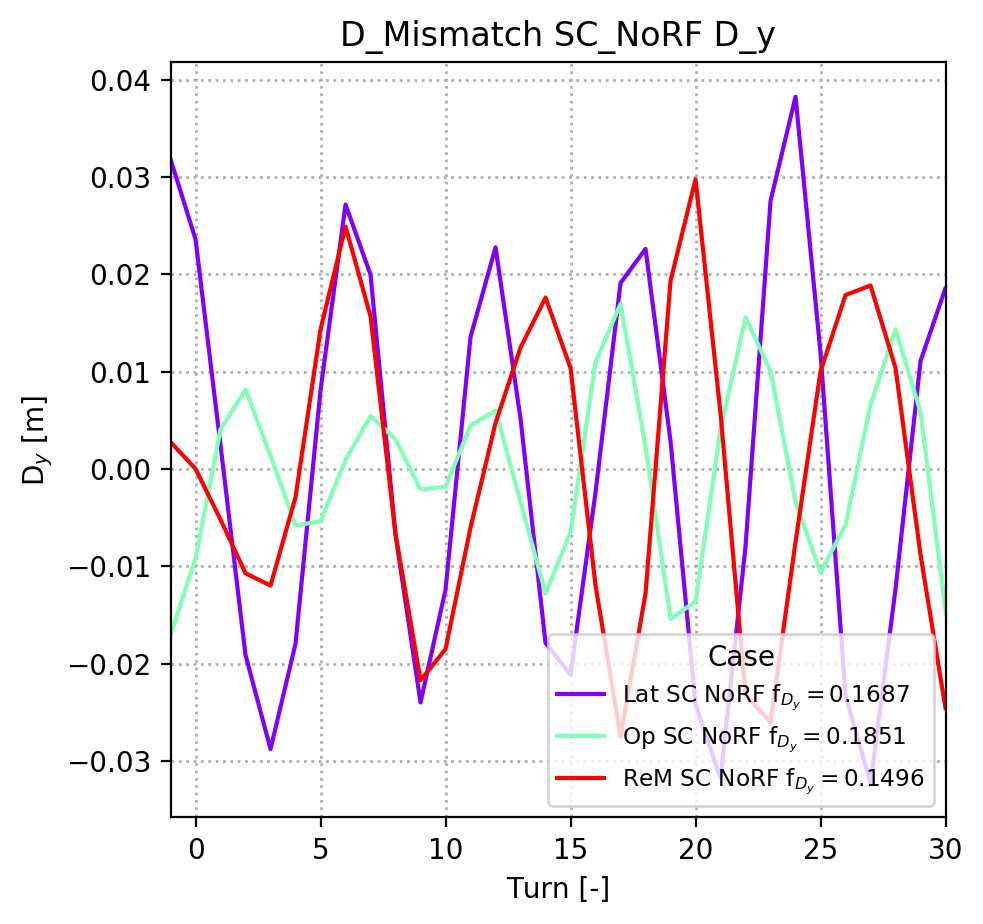

In [16]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    
        y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
        try:
            freq = pnf.naff(y, turns=turn_tot, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
        except IndexError:
            continue
        lab_ = key + r' f$_{D_y} = $' +str(round_sig(freq,4))
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=lab_, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

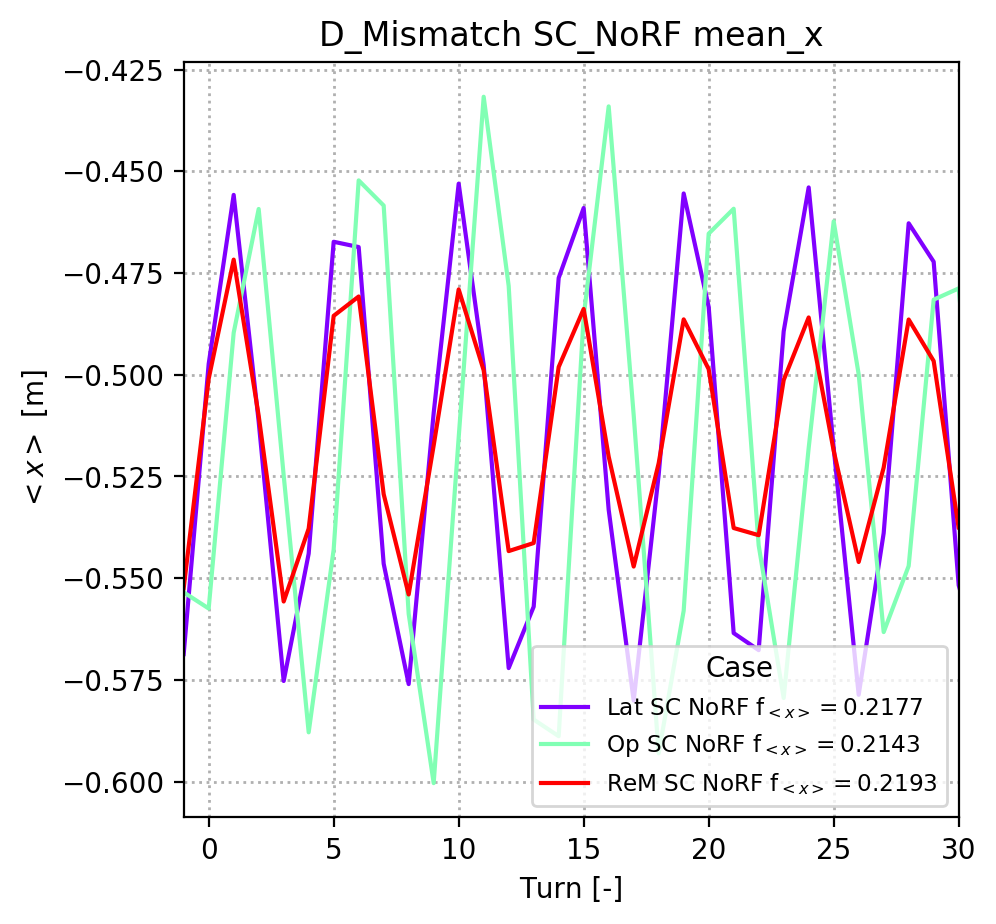

In [17]:
parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    
        y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
        try:
            freq = pnf.naff(y, turns=turn_tot, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
        except IndexError:
            continue
        lab_ = key + r' f$_{<x>} = $' +str(round_sig(freq,4))
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E3, label=lab_, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

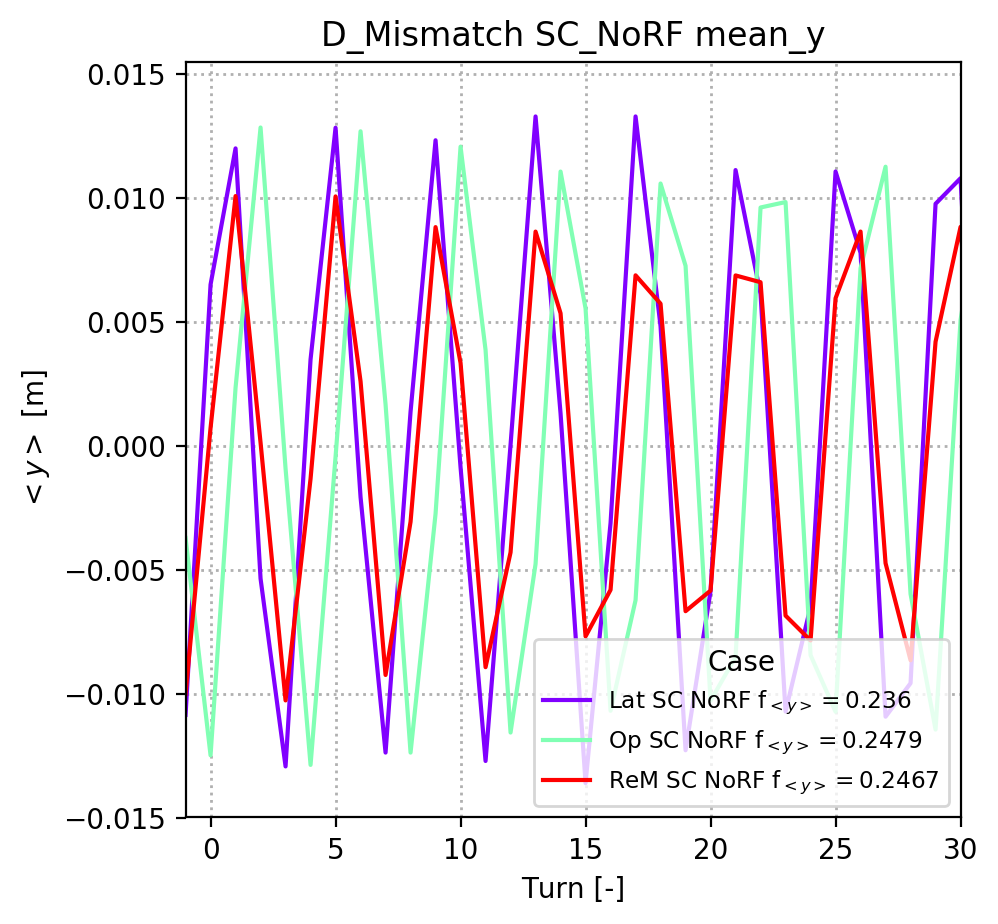

In [18]:
parameter = 'mean_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$<y>$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    
        y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
        try:
            freq = pnf.naff(y, turns=turn_tot, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
        except IndexError:
            continue
        lab_ = key + r' f$_{<y>} = $' +str(round_sig(freq,4))
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E3, label=lab_, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

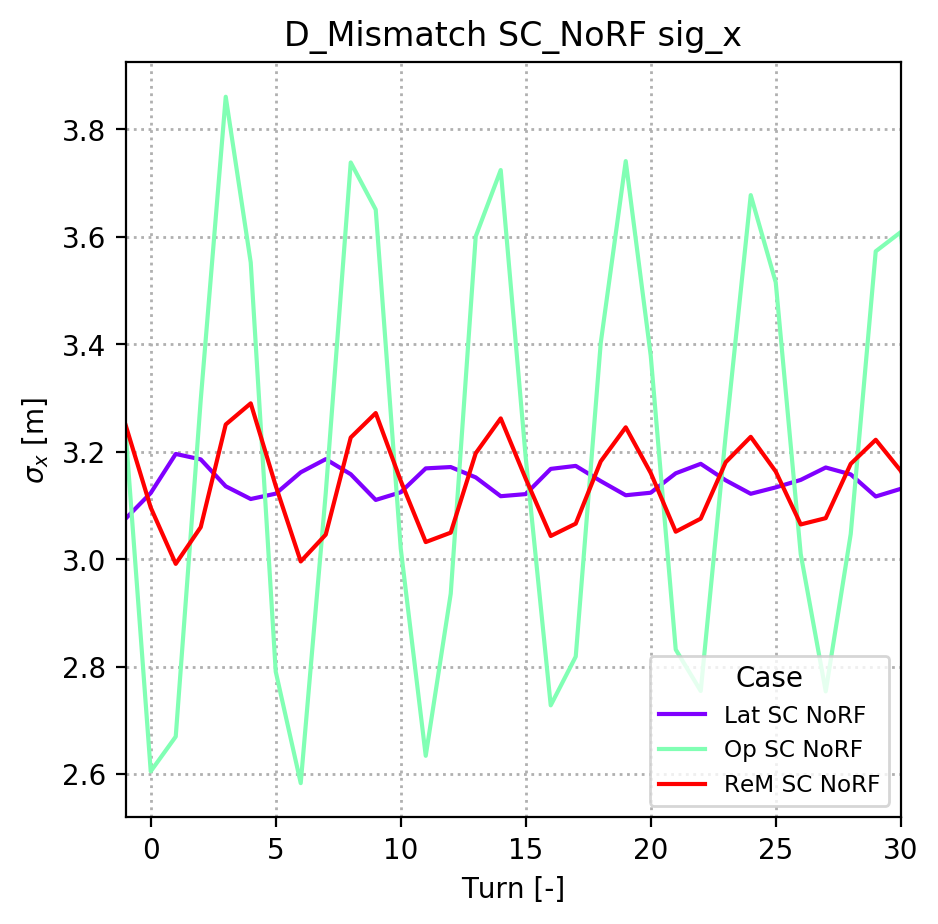

In [19]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    
        #y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
        #try:
        #    freq = pnf.naff(y, turns=turn_tot, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
        #except IndexError:
        #    continue
        #lab_ = key + r' f$_{\sigma_x} = $' +str(round_sig(freq,4))
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E3, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

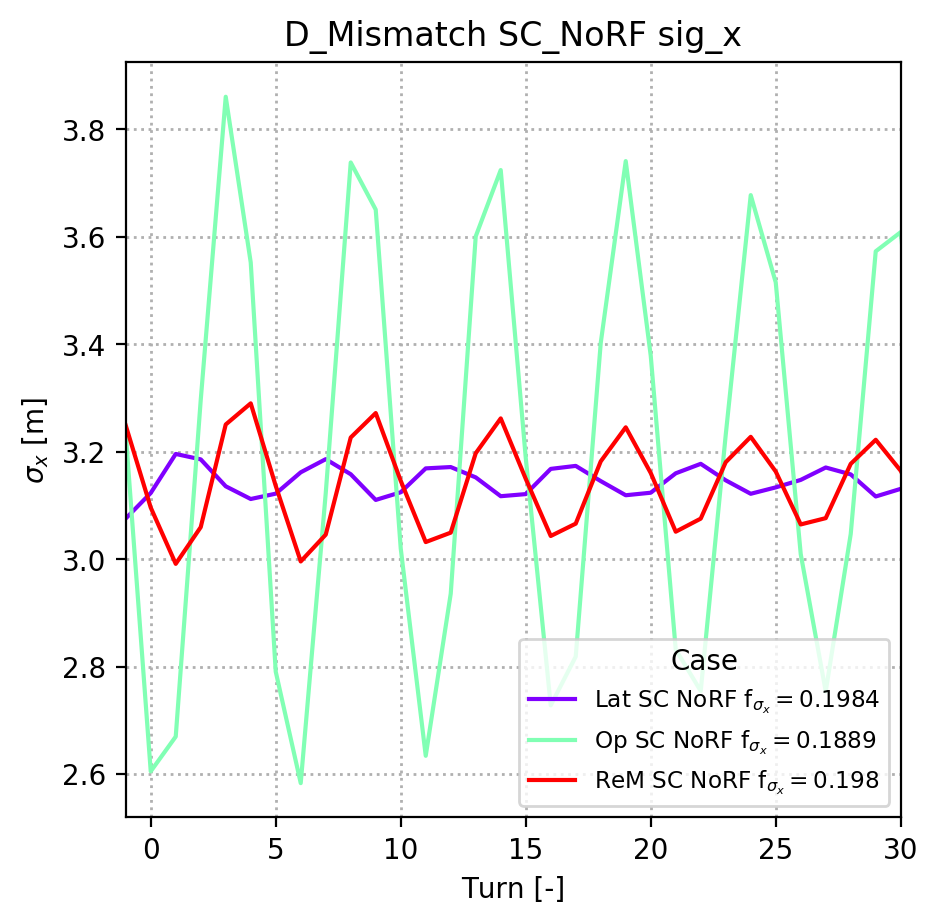

In [20]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    
        y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
        try:
            freq = pnf.naff(y, turns=turn_tot, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
        except IndexError:
            continue
        lab_ = key + r' f$_{\sigma_x} = $' +str(round_sig(freq,4))
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E3, label=lab_, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

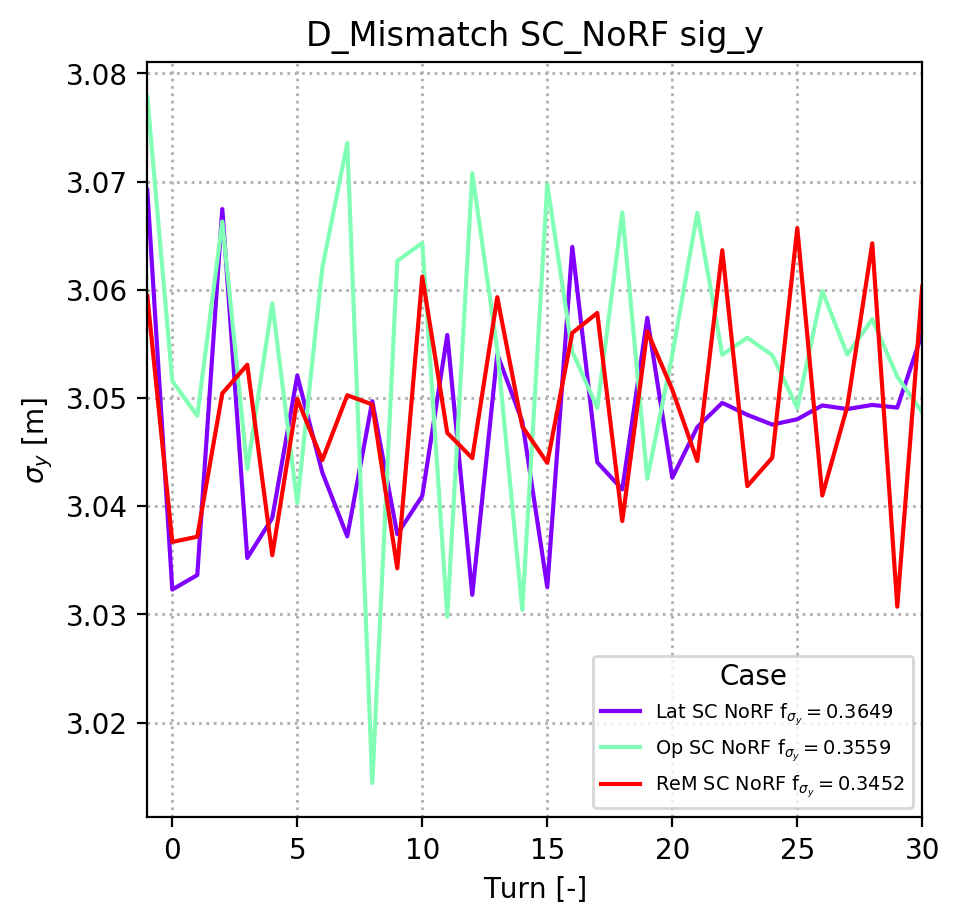

In [21]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    
        y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
        try:
            freq = pnf.naff(y, turns=turn_tot, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
        except IndexError:
            continue
        lab_ = key + r' f$_{\sigma_y} = $' +str(round_sig(freq,4))
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E3, label=lab_, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);


 Momentum Offset =  Lat SC NoRF
 y_0 =  0.7682599819047763
 Offset =  0.8039225211828003  um
 Amplitude =  0.030280856616705387  um
 Frequency =  0.2112
 Phase offset =  0.15915494309189532
0.6914339837142987
0.845085980095254

 Momentum Offset =  Op SC NoRF
 y_0 =  0.8488285042439684
 Offset =  0.828219105652896  um
 Amplitude =  0.33064310964089916  um
 Frequency =  0.2238
 Phase offset =  2.3231933492053585e-29
0.7639456538195716
0.9337113546683653

 Momentum Offset =  ReM SC NoRF
 y_0 =  0.8572263197572099
 Offset =  0.7998503336744835  um
 Amplitude =  0.07541020352975505  um
 Frequency =  0.2299
 Phase offset =  6.489535768260653e-79
0.7715036877814889
0.9429489517329309


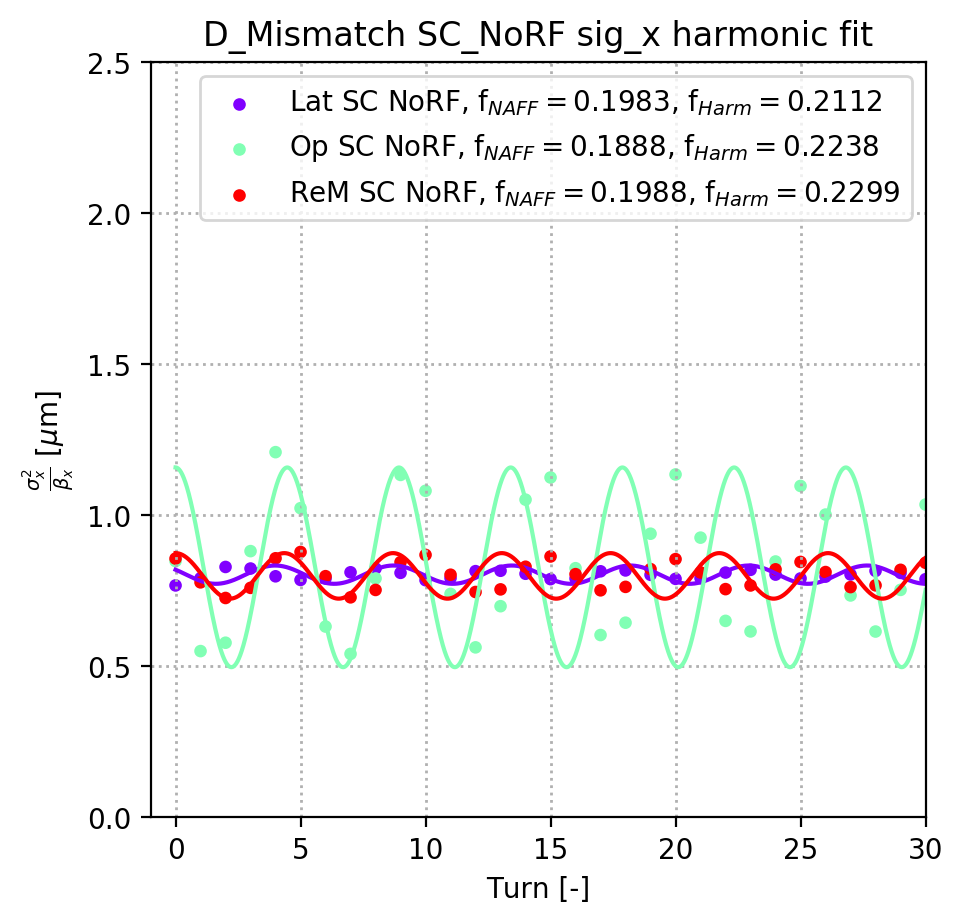

In [22]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter + ' harmonic fit'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\sigma_x^2}{\beta_x}$ [$\mu$m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

x_fine = np.array(range(0, 40000))*0.001

# Iterate over cases in dictionary
for key, value in sorted(dd1.iteritems()):
    
    x = np.array(dd1[key]['turn'][0]+1)    
    y_0 = dd1[key][parameter][0]*1E3    
    y_sq = np.square(y_0)    
    y = np.square(y_0)/ (np.mean(dd1[key]['beta_x'][0]))
    
    # NAFF METHOD
    y_naff = (y-np.mean(y))
    try:
        freq = pnf.naff(y_naff, turns=turn_tot, nterms=1, skipTurns=4, getFullSpectrum=False, window=1)[0][1]
    except IndexError:
        continue

    # Harmonic
    mean_y = np.mean(y)    
    if mean_y < 0.0 :
        offset_min = 1.1 * y[0]
        offset_max = 0.9 * y[0]
    else:
        offset_min = 0.9 * y[0]
        offset_max = 1.1 * y[0]          

    amp_min = 0.55*0.9*(np.max(y) - np.min(y))
    amp_max = 0.55*1.1*(np.max(y) - np.min(y))    

    phase_min = 0
    phase_max = 1

    freq_min = 0.21
    freq_max = 0.23 
    
    if key is 'Op NoSC NoRF':
        offset_min = 0.999 * y[0]
        offset_max = 1.001 * y[0] 
        phase_min = 0
        phase_max = 0.1
    
    popt, pcov = curve_fit(harmonic_fn, x, y, method = 'trf', bounds =((offset_min,amp_min,phase_min,freq_min),(offset_max,amp_max,phase_max,freq_max)))

    print '\n Momentum Offset = ', key
    print ' y_0 = ',y[0]
    print ' Offset = ', popt[0], ' um'
    print ' Amplitude = ', popt[1], ' um'
    print ' Frequency = ', round(popt[3],4)
    print ' Phase offset = ', popt[2] / (2*np.pi)
    print offset_min
    print offset_max

    ax1.plot(x_fine, harmonic_fn(x_fine, popt[0], popt[1], popt[2], popt[3]), color=colors[c_it])
   
    # Plot simulation data
    lab_ = key + r', f$_{NAFF} = $' + str(round_sig(freq,4)) + r', f$_{Harm} = $' + str(round(popt[3],4))
    s = np.ones(len(x))*50
    ax1.scatter(x, y, s=s, label=lab_, color=colors[c_it], marker='.');
    c_it = c_it + 1;

#ax1.plot(x_fine, harmonic_fn(x_fine, 0.880142067768054, 0.36771247328496753, 0.2182336374976979*(2*np.pi), 0.2184), color='k')        
#ax1.plot(x_fine, harmonic_fn(x_fine, 0.7921278703019381, 0.10293808621532054, 0.09008470591120446*(2*np.pi), 0.2184), color='k')        

ax1.legend(fontsize='medium', loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,30);
ax1.set_ylim(0.,2.5);

parameter = 'sig_x_sqd_norm'
savename = save_folder + '/'+ main_label + '_' + parameter + '_harmonic.png'
plt.savefig(savename, dpi = 800);

/usr/lib64/python2.7/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


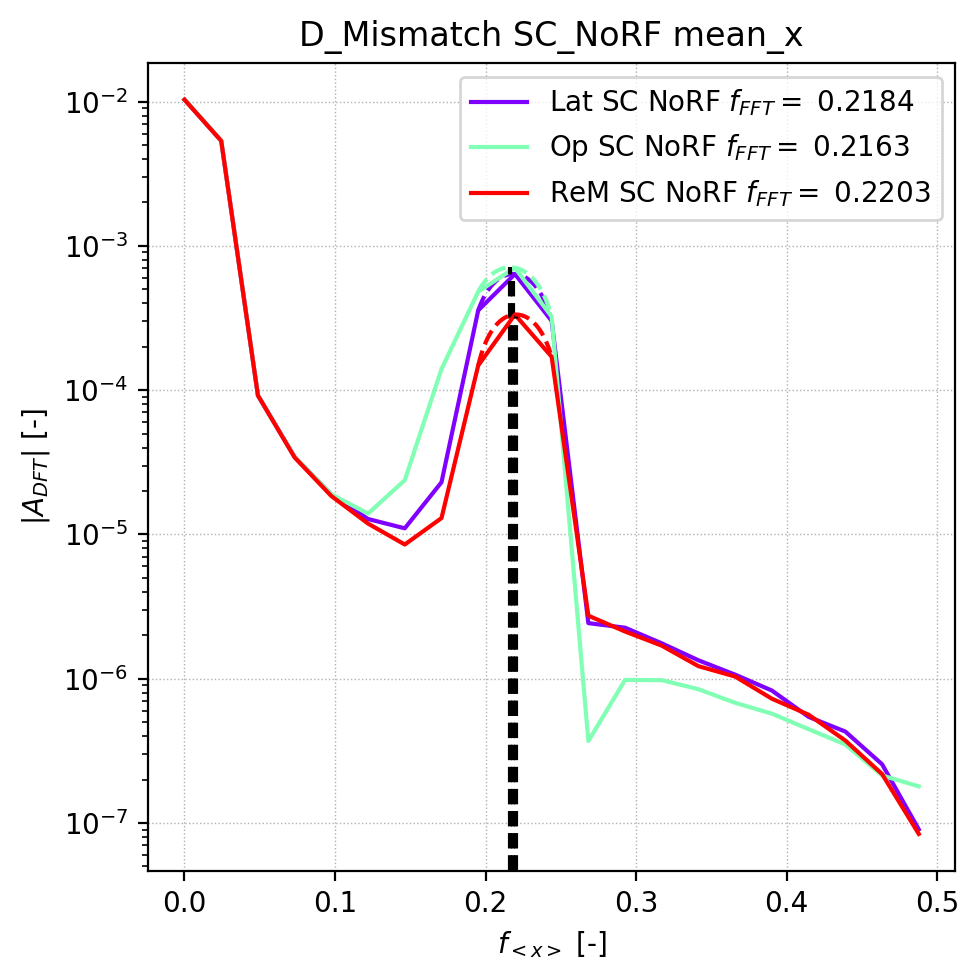

In [23]:
parameter='mean_x'

# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{<x>}$ [-]');

N_turns = 41

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):

    ampl_h = np.abs(np.fft.rfft(dd1[key][parameter][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ = str(key) + ' $f_{FFT} = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='-')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it], ls='--')
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    #f_sig_y.append(f_max)
    #qy_fft.append(f_max)
    
ax1.legend(fontsize='medium', loc=1);
ax1.grid(lw=0.5, ls=':')

savename = save_folder + '/'+ main_label + '_' + parameter + '_FFT.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

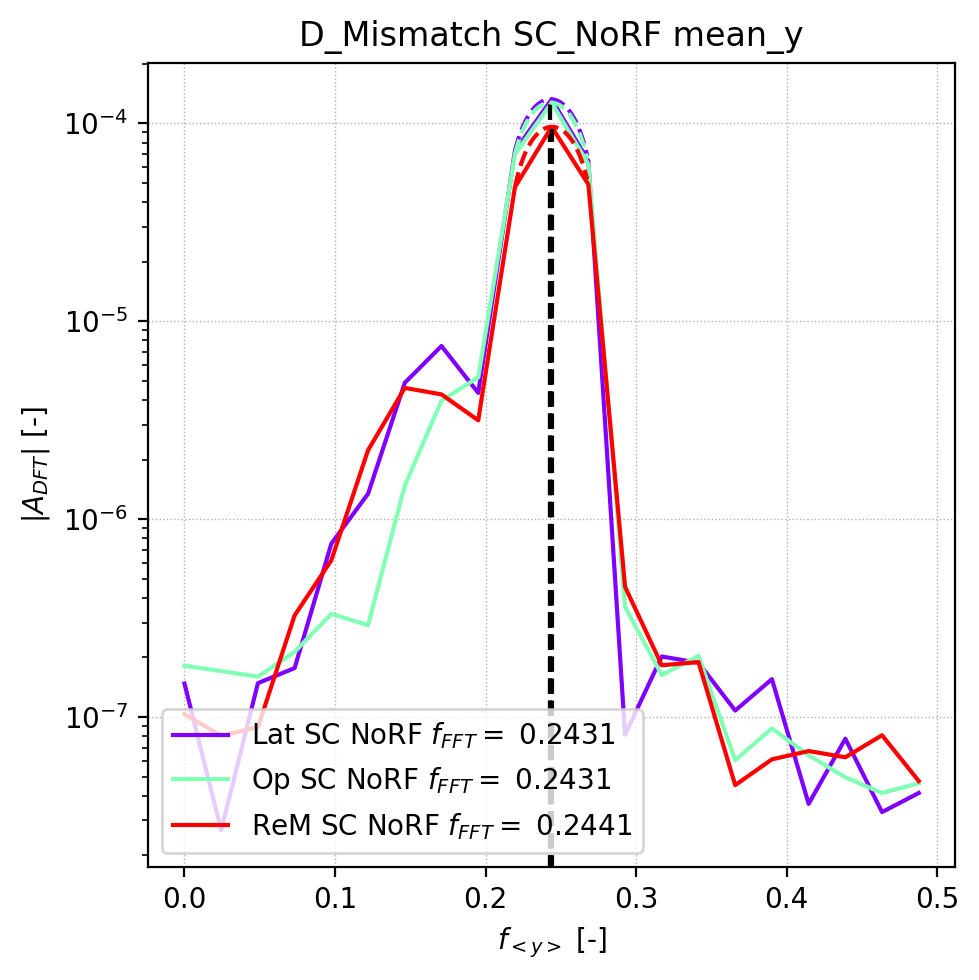

In [24]:
parameter='mean_y'

# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{<y>}$ [-]');

N_turns = 41

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):

    ampl_h = np.abs(np.fft.rfft(dd1[key][parameter][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ = str(key) + ' $f_{FFT} = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='-')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it], ls='--')
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    #f_sig_y.append(f_max)
    #qy_fft.append(f_max)
    
ax1.legend(fontsize='medium', loc=3);
ax1.grid(lw=0.5, ls=':')

savename = save_folder + '/'+ main_label + '_' + parameter + '_FFT.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

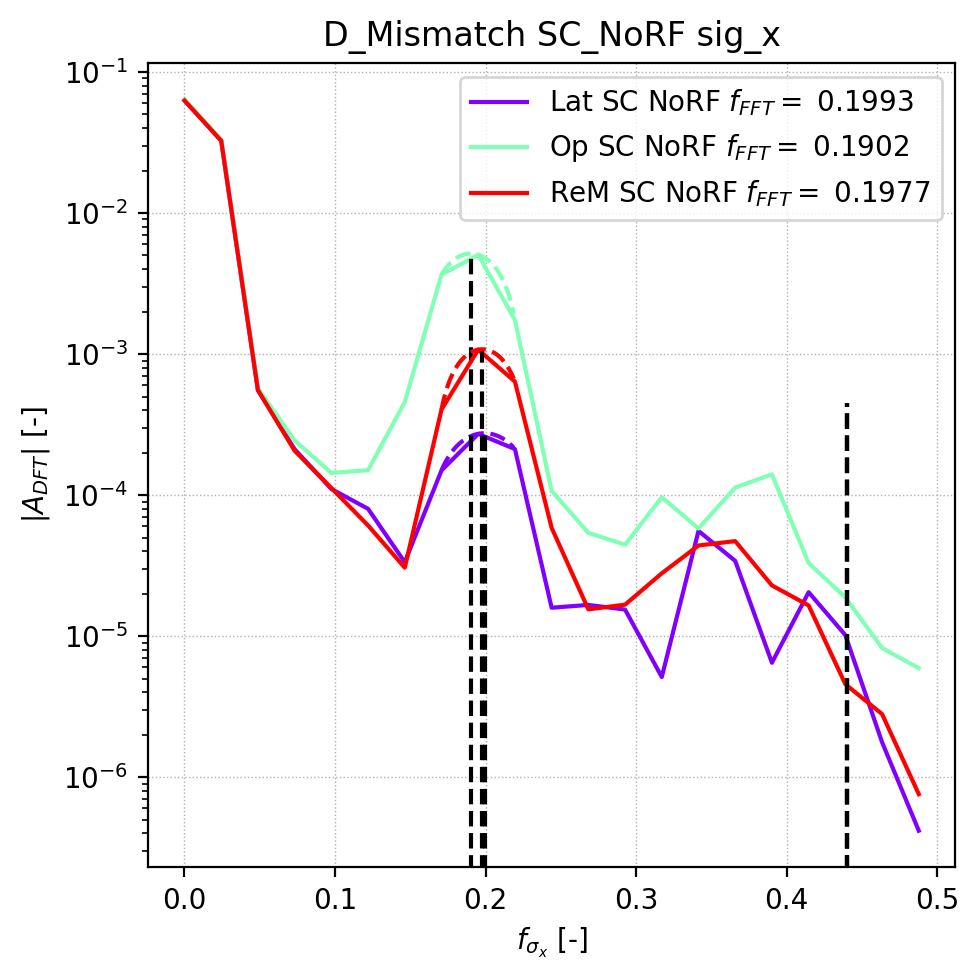

In [25]:
parameter='sig_x'

# Store envelope oscillation frequencies
f_sig_y = []

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$|A_{DFT}|$ [-]');
ax1.set_xlabel(r'$f_{\sigma_{x}}$ [-]');

N_turns = 41

hann=np.hanning(N_turns)
freq_h = np.fft.rfftfreq(N_turns)

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):

    ampl_h = np.abs(np.fft.rfft(dd1[key][parameter][0]*hann))
    n = np.argmax(ampl_h[4:]) + 4
    popt, pcov = curve_fit(quadratic,freq_h[n-1:n+2],ampl_h[n-1:n+2])
    f_range = np.arange(freq_h[n-1],freq_h[n+1],0.001)
    f_max = -1*popt[1]/(2*popt[0])
    a_max = quadratic(f_max,popt[0],popt[1],popt[2])
    lab_ = str(key) + ' $f_{FFT} = $ '+ str(round(f_max,4))
    plt.semilogy(freq_h,ampl_h,'b', label = lab_, color=colors[c_it], ls='-')
    plt.semilogy([f_max, f_max], [0, a_max],'--k')
    plt.semilogy([0.44, 0.44], [0, 4.5E-4],'--k')
    plt.semilogy(f_range,quadratic(f_range,popt[0],popt[1],popt[2]), color=colors[c_it], ls='--')
    f_max = -1*popt[1]/(2*popt[0])
    c_it = c_it + 1
        
    #f_sig_y.append(f_max)
    #qy_fft.append(f_max)
    
ax1.legend(fontsize='medium', loc=1);
ax1.grid(lw=0.5, ls=':')

savename = save_folder + '/'+ main_label + '_' + parameter + '_FFT.png'
plt.tight_layout()
plt.savefig(savename, dpi = 800);

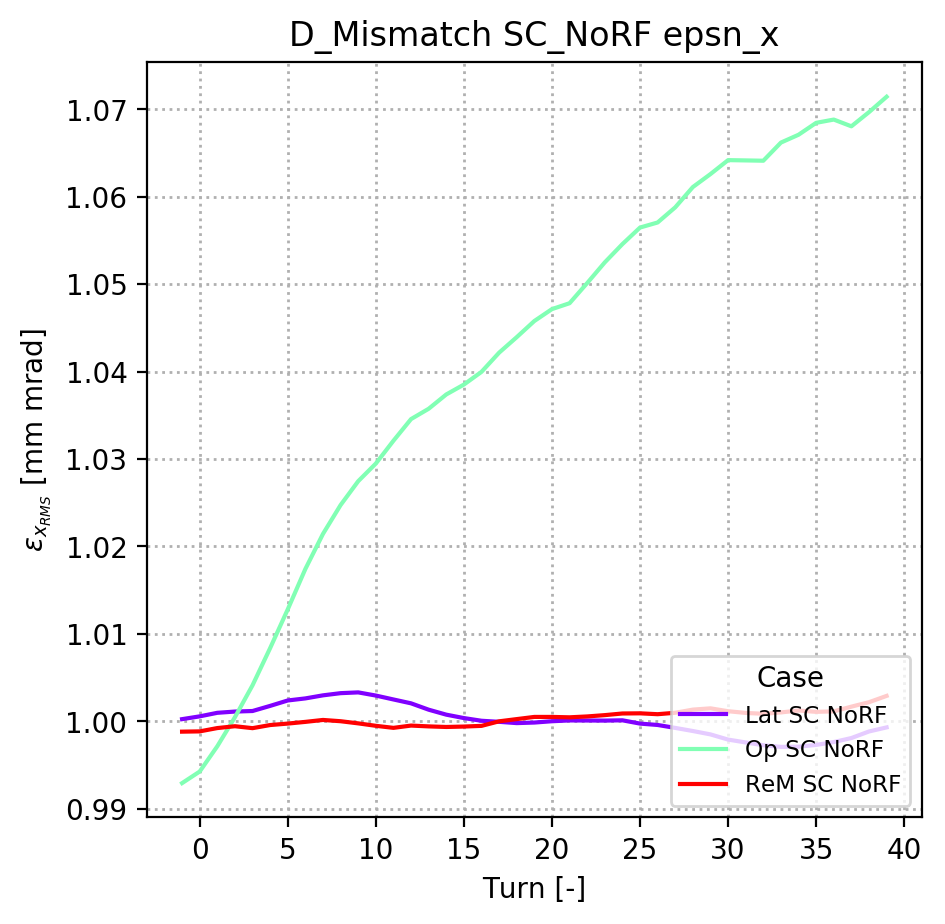

In [26]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{x_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

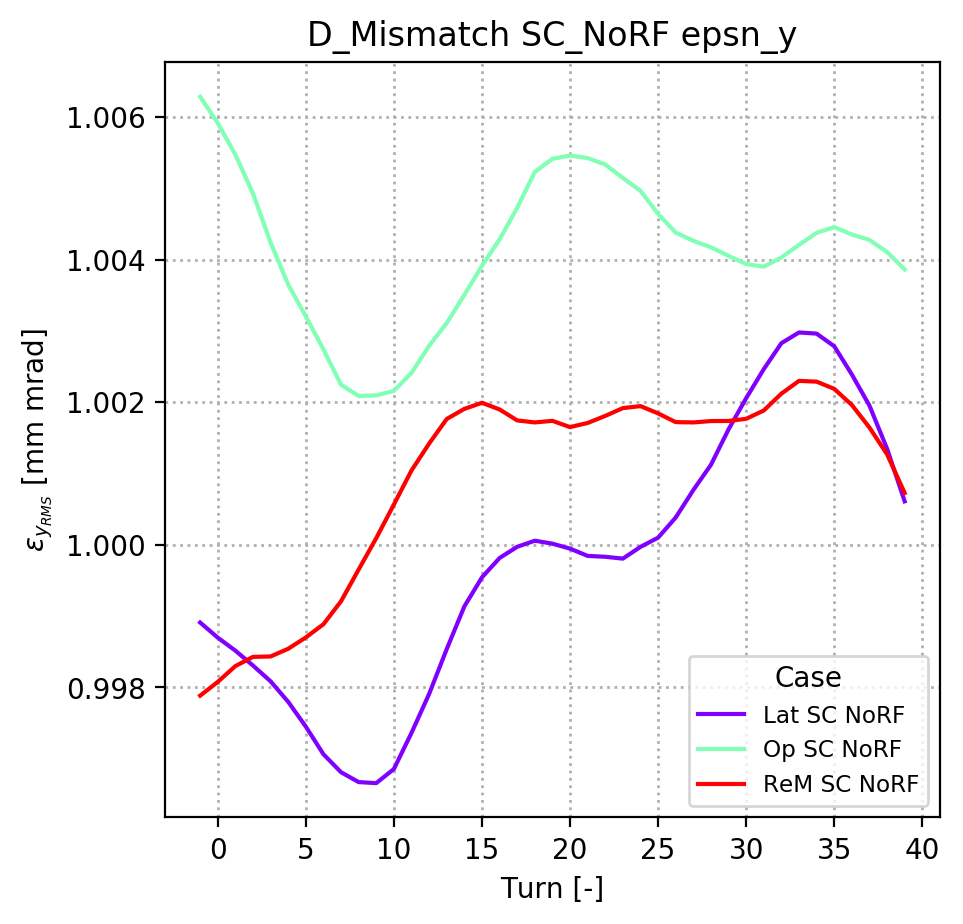

In [27]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{y_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

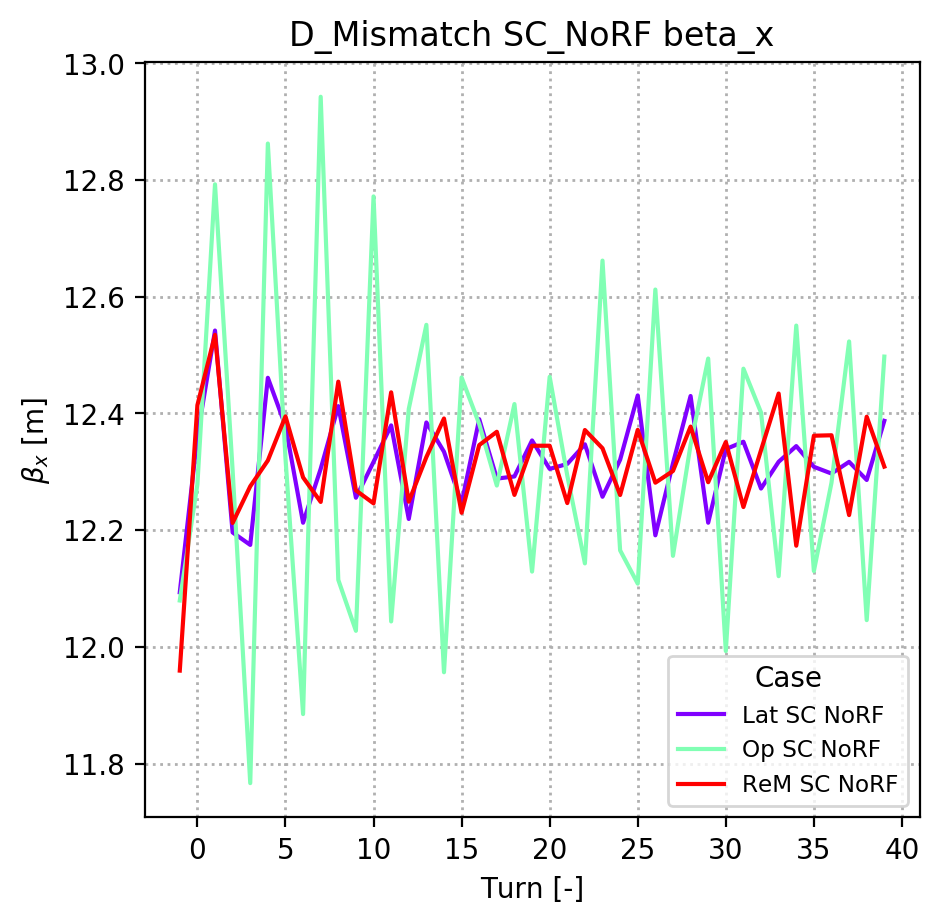

In [28]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

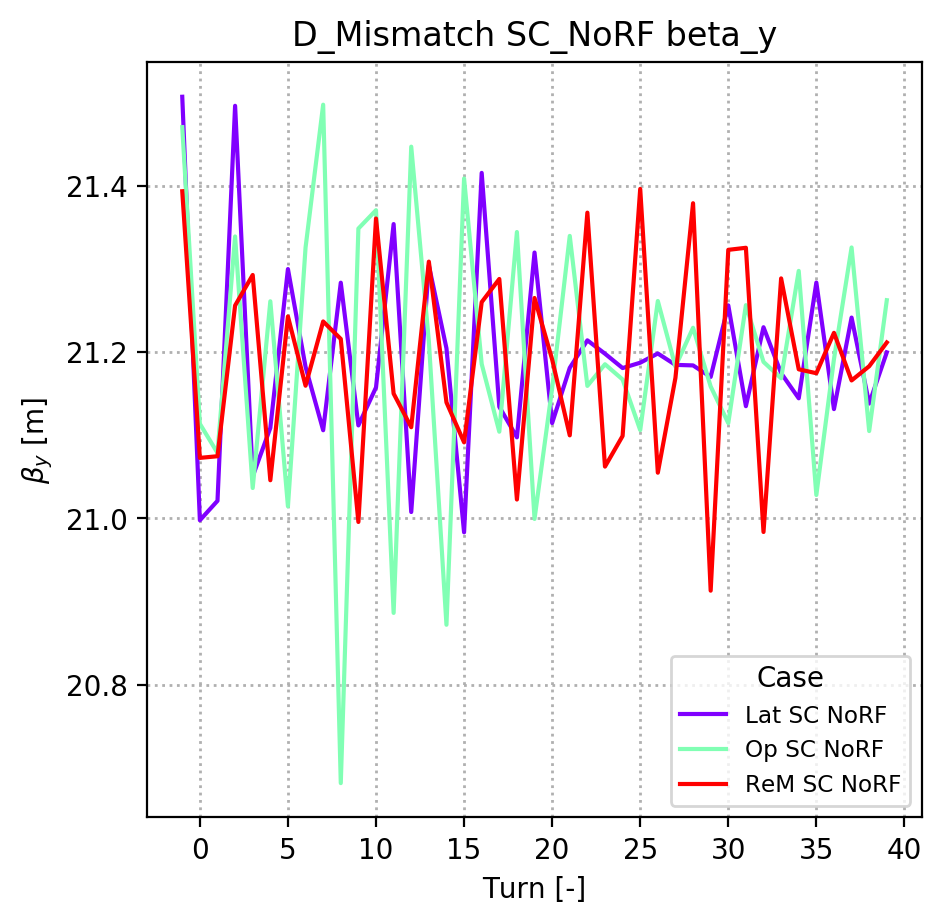

In [29]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{y}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

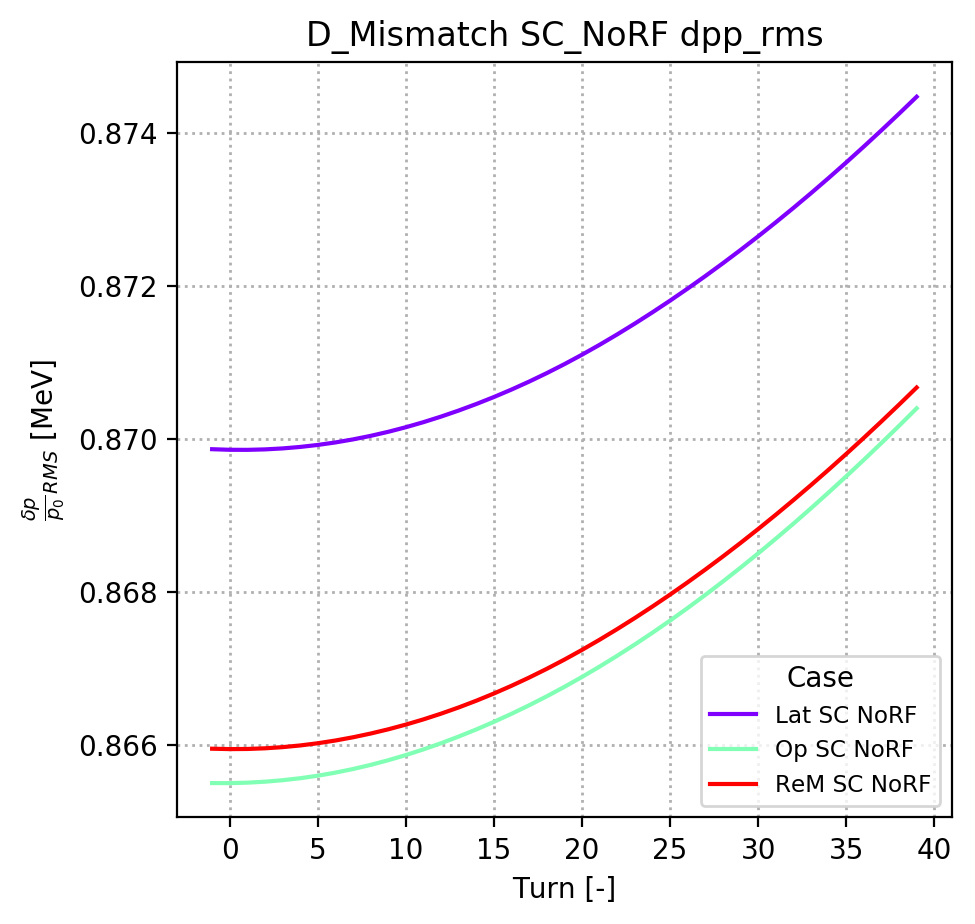

In [30]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p_0}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E3, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

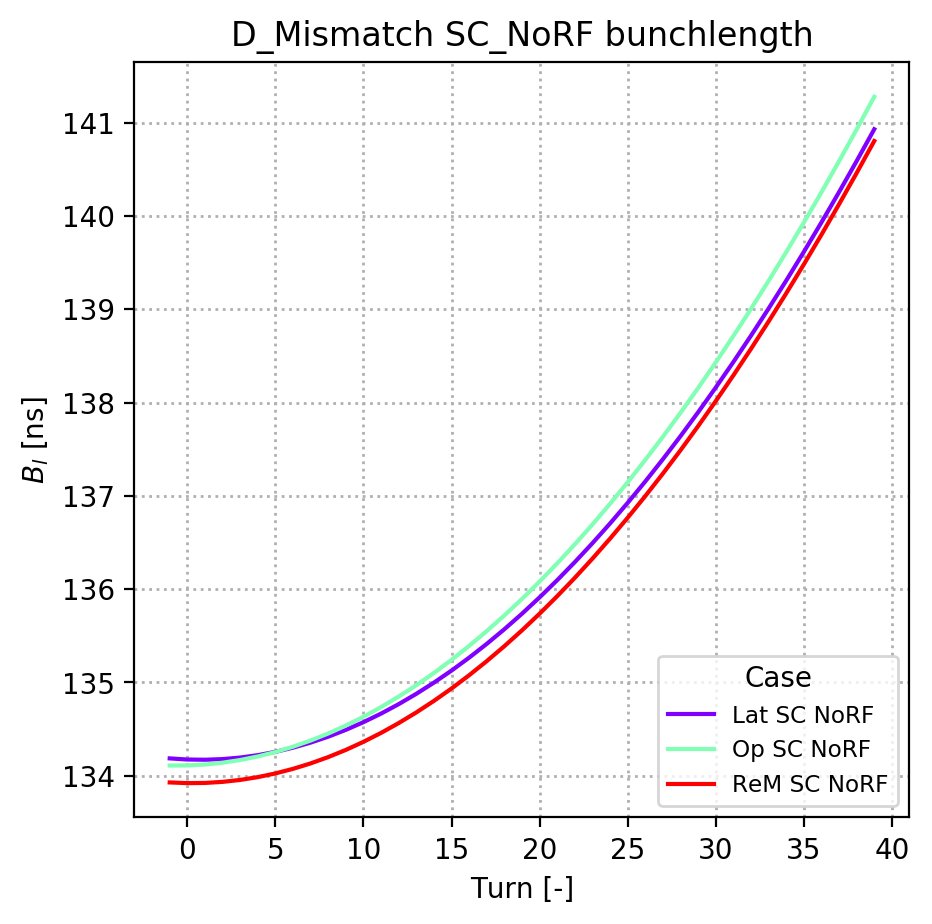

In [31]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E9, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=4, title=legend_label);
ax1.grid(lw=1, ls=':');
#ax1.set_xlim(-1,30);

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);